# Human

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("stats/summary.csv")
df

,questionnaire,model,mode_mode,test_count,Extraversion_mean,Extraversion_std,Agreeableness_mean,Agreeableness_std,Conscientiousness_mean,Conscientiousness_std,Neuroticism_mean,Neuroticism_std,Openness_mean,Openness_std
0,BFI,crowd,crowd,6076,3.2,0.9,3.6,0.7,3.5,0.7,3.3,0.8,3.9,0.7
1,IPIP-NEO,crowd,crowd,619150,3.4,1.0,3.7,1.0,3.6,1.0,2.8,1.0,3.4,1.1
2,BFI,llama3_8b,direct,5,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.1,0.1
3,BFI,llama3_8b,train_0xxxx,5,3.8,0.2,4.7,0.1,3.8,0.3,2.5,0.1,5.0,0.0
4,BFI,llama3_8b,train_1xxxx,5,2.2,0.5,2.8,0.3,4.2,0.4,2.3,0.4,2.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,IPIP-NEO,llama3_70b,prompt_chat_x1xxx,5,3.3,0.1,3.1,0.0,2.2,0.1,2.6,0.1,3.1,0.1
142,IPIP-NEO,llama3_70b,prompt_chat_xxxx0,5,2.6,0.1,3.7,0.1,3.5,0.1,3.0,0.1,3.1,0.1
143,IPIP-NEO,llama3_70b,prompt_chat_xx0xx,5,4.0,0.1,3.6,0.0,3.4,0.1,2.2,0.1,3.3,0.0
144,IPIP-NEO,llama3_70b,prompt_chat_xxxx1,5,3.6,0.0,3.7,0.1,3.8,0.0,2.2,0.1,3.2,0.1


In [62]:
import pandas as pd
df = pd.read_csv("/home/jiaruil5/personality/llm_personality/psychgenerator_opensource/data/IPIP_NEO_120.csv")
df = df.rename(columns={f"i{i}": i for i in range(1, 121)})
df = df[[i for i in range(1, 121)]]
df

,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
0,5,4,5,4,4,2,5,5,4,4,...,5,2,4,4,4,2,4,1,5,4
1,5,4,4,2,5,5,5,4,5,4,...,1,4,3,3,4,4,2,3,4,3
2,4,5,5,4,4,2,4,3,4,4,...,2,3,2,4,4,2,4,2,5,4
3,3,5,1,1,3,4,5,4,2,2,...,1,5,5,5,4,1,5,3,5,3
4,2,4,2,2,4,4,5,4,3,2,...,1,2,4,3,5,2,4,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619145,5,4,4,4,4,2,5,4,4,5,...,4,4,2,4,4,4,4,2,5,4
619146,4,5,3,5,4,1,2,4,5,5,...,4,3,4,2,2,1,4,1,4,5
619147,4,2,5,4,5,4,2,4,5,3,...,2,3,4,4,1,4,3,3,4,4
619148,4,4,3,2,3,5,4,1,3,4,...,2,1,4,5,2,5,2,2,5,3


In [63]:
import json
questionnaire = json.load(open("/home/jiaruil5/personality/llm_personality/evaluation/PsychoBench/questionnaire_ipip_neo.json", 'r'))
for i in questionnaire['reverse']:
    df[i] = 6 - df[i]

new_df = pd.DataFrame()
for trait in ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']:
    questions = []
    len_category = 0
    for categories in questionnaire['categories']:
        if trait == categories['cat_name']:
            questions = categories['cat_questions']
            len_category = len(categories['cat_questions'])
            break
    
    tot_scores = 0
    for i in questions:
        tot_scores += df[i]
    tot_scores /= len_category
    new_df[trait] = tot_scores

In [27]:
new_df

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,3.250000,3.208333,3.375000,2.458333,2.458333
1,3.125000,3.208333,3.250000,2.458333,3.416667
2,3.541667,2.458333,3.333333,2.541667,3.083333
3,3.125000,2.875000,3.583333,3.083333,3.375000
4,2.958333,3.166667,3.541667,3.208333,2.791667
...,...,...,...,...,...
619145,3.708333,3.250000,3.833333,2.833333,3.166667
619146,3.000000,2.833333,3.125000,2.583333,2.375000
619147,3.333333,3.541667,2.916667,2.791667,3.416667
619148,3.125000,3.041667,3.416667,2.833333,3.625000


In [64]:
human_corr1 = new_df.corr()

In [65]:
print(human_corr1.to_latex())

\begin{tabular}{lrrrrr}
\toprule
 & Openness & Conscientiousness & Extraversion & Agreeableness & Neuroticism \\
\midrule
Openness & 1.000000 & 0.315547 & 0.169983 & 0.259755 & 0.359922 \\
Conscientiousness & 0.315547 & 1.000000 & 0.361045 & 0.442628 & 0.194155 \\
Extraversion & 0.169983 & 0.361045 & 1.000000 & 0.299808 & -0.229071 \\
Agreeableness & 0.259755 & 0.442628 & 0.299808 & 1.000000 & 0.157793 \\
Neuroticism & 0.359922 & 0.194155 & -0.229071 & 0.157793 & 1.000000 \\
\bottomrule
\end{tabular}



In [70]:
human_corr = human_corr1 + human_corr2

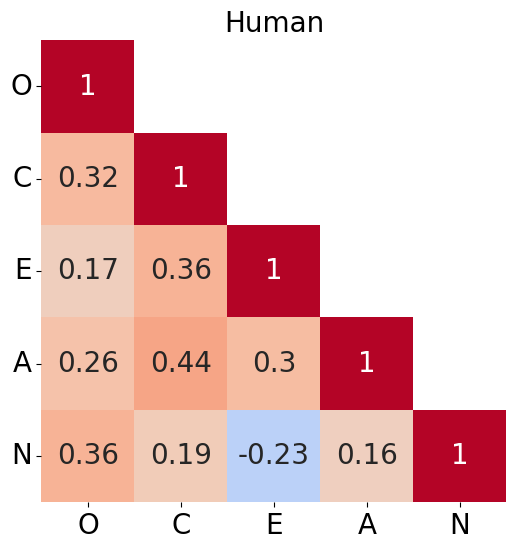

In [58]:
from scipy.stats import skew, kurtosis, probplot
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation Matrix
mask = np.triu(np.ones_like(human_corr1, dtype=bool), 1)
plt.figure(figsize=(6, 6))
human_corr1.columns = human_corr1.index = ['O', 'C', 'E', 'A', 'N']
sns.heatmap(human_corr1, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 20}, cbar=False)
# plt.xticks([])
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
# cbar = plt.gca().collections[0].colorbar
# cbar.ax.tick_params(labelsize=18)
# plt.show()
plt.title('Human', fontsize=20)
plt.savefig("stats/plots/corr/correlation_matrix_human.pdf", format="pdf", bbox_inches="tight")

In [68]:
human_corr

,Agreeableness,Conscientiousness,Extraversion,Neuroticism,Openness,agr_z,con_z,ext_z,neu_z,ope_z
Agreeableness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Conscientiousness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Extraversion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Neuroticism,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Openness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
agr_z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
con_z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ext_z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neu_z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ope_z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


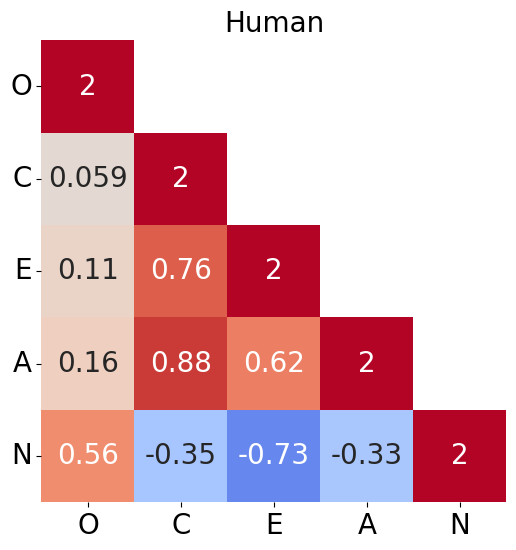

In [71]:
from scipy.stats import skew, kurtosis, probplot
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation Matrix
mask = np.triu(np.ones_like(human_corr, dtype=bool), 1)
plt.figure(figsize=(6, 6))
human_corr.columns = human_corr.index = ['O', 'C', 'E', 'A', 'N']
sns.heatmap(human_corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 20}, cbar=False)
# plt.xticks([])
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
# cbar = plt.gca().collections[0].colorbar
# cbar.ax.tick_params(labelsize=18)
# plt.show()
plt.title('Human', fontsize=20)
plt.savefig("stats/plots/corr/correlation_matrix_human.pdf", format="pdf", bbox_inches="tight")

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("stats/summary.csv")
labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
for idx_label, label in enumerate(labels):
    df[f"{label}"] = df[f"{label}_mean"]
    df = df.drop(columns=[f"{label}_mean", f"{label}_std"])

Method:  Prompt


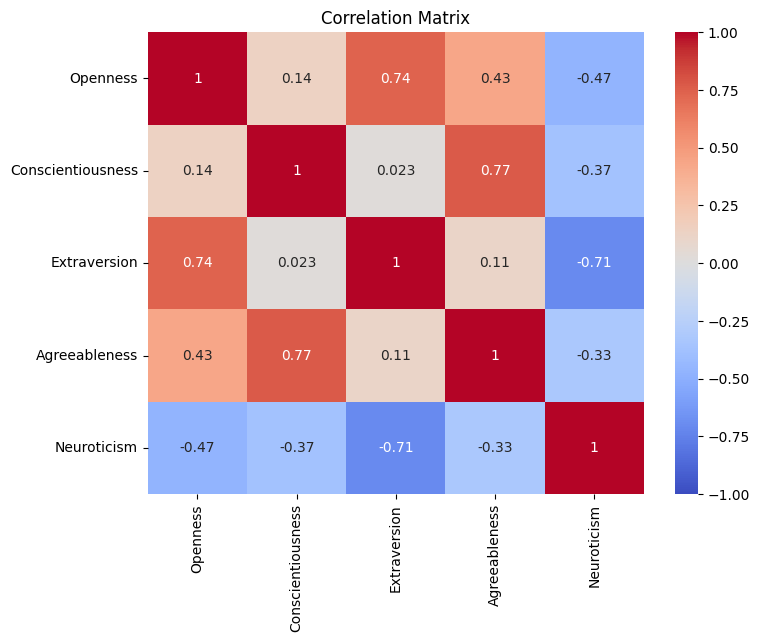

Method:  SFT


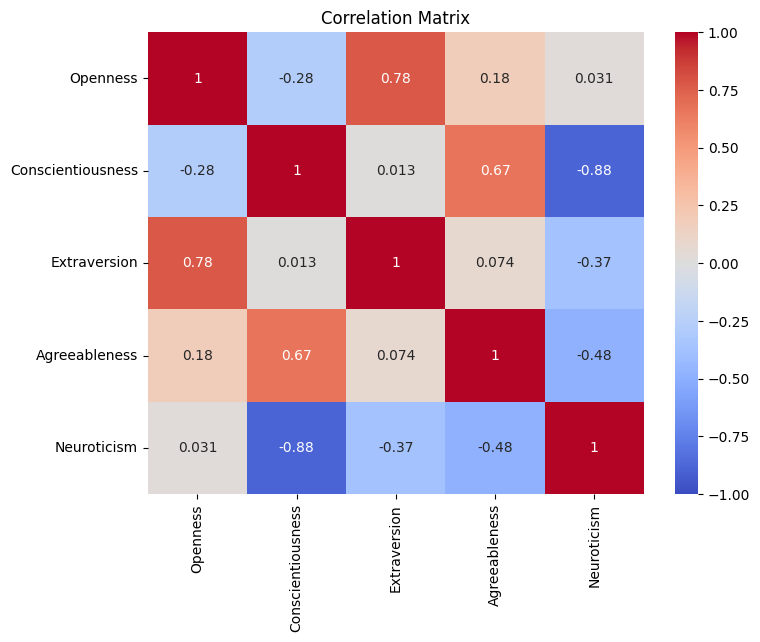

Method:  DPO


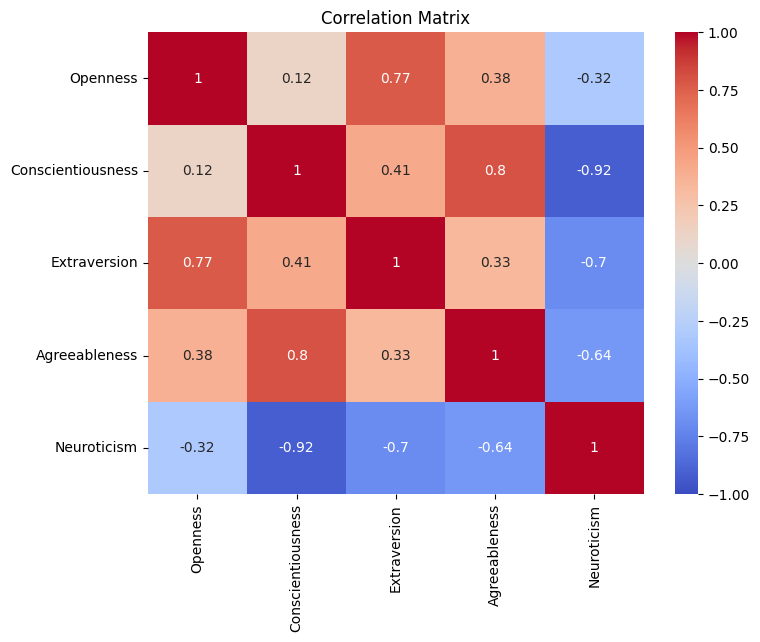

In [77]:
def set_ith_char(string, index, new_char):
    # Convert the string to a list of characters
    char_list = list(string)
    
    # Check if the index is within the valid range
    if 0 <= index < len(char_list):
        # Modify the i-th character
        char_list[index] = new_char
    else:
        raise IndexError("Index out of range.")
    
    # Convert the list back to a string
    return ''.join(char_list)

# Data values for each method
questionnaires = ["IPIP-NEO"]
# models = [("llama3_70b", "LLaMA3-70B"), ("llama3_8b", "LLaMA3-8B")]
# model, model_abbr = "llama3_8b", "LLaMA3-8B"
model, model_abbr = "llama3_70b", "LLaMA3-70B"
labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
description_modes = [(set_ith_char("xxxxx", idx_1, str(idx_2)), f"{level} {label}") for idx_1, label in enumerate(labels) for idx_2, level in enumerate(['High', 'Low'])]

raw_data = {}
for method, method_abbr in [["Prompt", "prompt_chat_"], ["SFT", "train_"], ['DPO', "train_dpo_"]]:
    raw_data[method] = {"Openness": [], "Conscientiousness": [], "Extraversion": [], "Agreeableness": [], "Neuroticism": []}
    
    for questionnaire in questionnaires:
        for mode, description in description_modes:
            data_point = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'{method_abbr}{mode}')) & (df['model'] == model)][labels].values.tolist()[0]
        
            raw_data[method]['Openness'].append(data_point[0])
            raw_data[method]['Conscientiousness'].append(data_point[1])
            raw_data[method]['Extraversion'].append(data_point[2])
            raw_data[method]['Agreeableness'].append(data_point[3])
            raw_data[method]['Neuroticism'].append(data_point[4])
    
    df_corr = pd.DataFrame(raw_data[method])
    correlation_matrix = df_corr.corr()
    print("Method: ", method)
    # print(correlation_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()
    raw_data[method] = correlation_matrix

Method:  Prompt


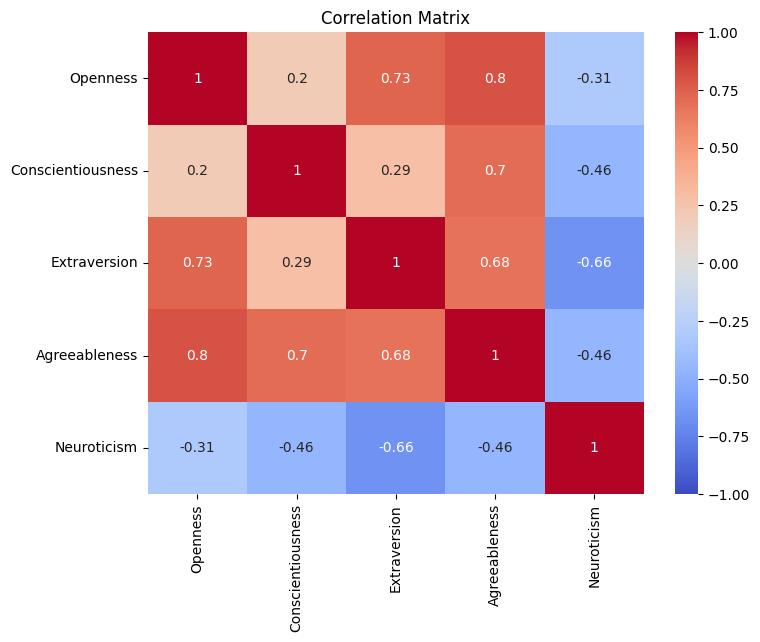

Method:  SFT


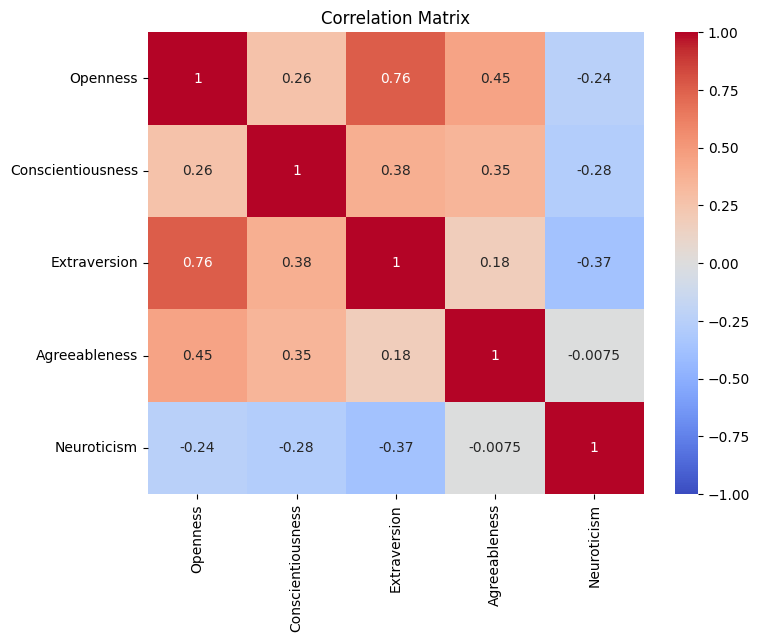

Method:  DPO


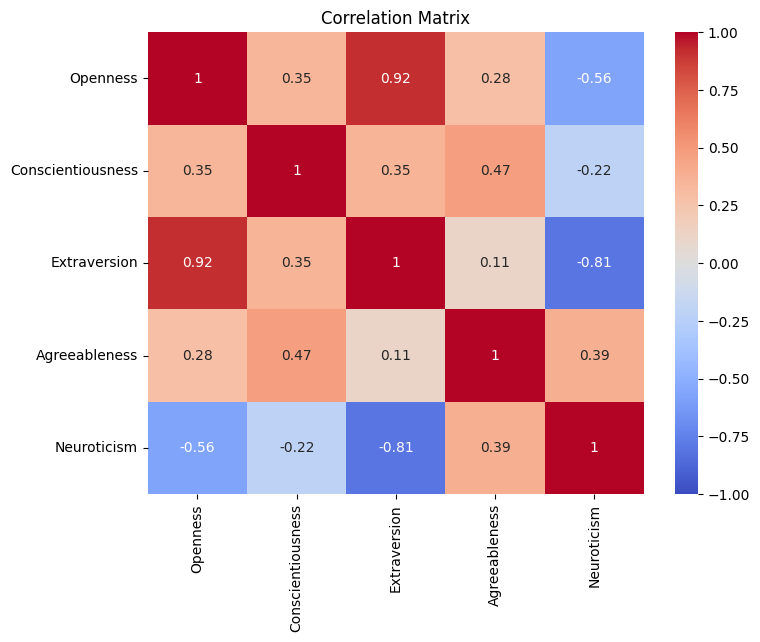

In [78]:
def set_ith_char(string, index, new_char):
    # Convert the string to a list of characters
    char_list = list(string)
    
    # Check if the index is within the valid range
    if 0 <= index < len(char_list):
        # Modify the i-th character
        char_list[index] = new_char
    else:
        raise IndexError("Index out of range.")
    
    # Convert the list back to a string
    return ''.join(char_list)

# Data values for each method
questionnaires = ["IPIP-NEO"]
# models = [("llama3_70b", "LLaMA3-70B"), ("llama3_8b", "LLaMA3-8B")]
model, model_abbr = "llama3_8b", "LLaMA3-8B"
# model, model_abbr = "llama3_70b", "LLaMA3-70B"
labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
description_modes = [(set_ith_char("xxxxx", idx_1, str(idx_2)), f"{level} {label}") for idx_1, label in enumerate(labels) for idx_2, level in enumerate(['High', 'Low'])]

raw_data = {}
for method, method_abbr in [["Prompt", "prompt_v1_"], ["SFT", "train_"], ['DPO', "train_dpo_"]]:
    raw_data[method] = {"Openness": [], "Conscientiousness": [], "Extraversion": [], "Agreeableness": [], "Neuroticism": []}
    
    for questionnaire in questionnaires:
        data_points = []
        for mode, description in description_modes:
            data_point = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'{method_abbr}{mode}')) & (df['model'] == model)][labels].values.tolist()[0]
            data_points.append(data_point)
            
        raw_data[method]['Openness'].extend(data_points[0])
        raw_data[method]['Openness'].extend(data_points[1])
        raw_data[method]['Conscientiousness'].extend(data_points[2])
        raw_data[method]['Conscientiousness'].extend(data_points[3])
        raw_data[method]['Extraversion'].extend(data_points[4])
        raw_data[method]['Extraversion'].extend(data_points[5])
        raw_data[method]['Agreeableness'].extend(data_points[6])
        raw_data[method]['Agreeableness'].extend(data_points[7])
        raw_data[method]['Neuroticism'].extend(data_points[8])
        raw_data[method]['Neuroticism'].extend(data_points[9])
    
    df_corr = pd.DataFrame(raw_data[method])
    correlation_matrix = df_corr.corr()
    print("Method: ", method)
    # print(correlation_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()
    raw_data[method] = correlation_matrix

In [76]:
# raw_data['DPO'].loc['Agreeableness', 'Extraversion'] = 0.101836
# raw_data['DPO'].loc['Extraversion', 'Agreeableness'] = 0.101836
# raw_data['DPO']

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
Openness,1.000000,0.346935,0.919020,0.283884,-0.563436
Conscientiousness,0.346935,1.000000,0.352689,0.472576,-0.216142
Extraversion,0.919020,0.352689,1.000000,0.101836,-0.805890
Agreeableness,0.283884,0.472576,0.101836,1.000000,0.388262
Neuroticism,-0.563436,-0.216142,-0.805890,0.388262,1.000000


In [79]:
raw_data['DPO']

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
Openness,1.000000,0.346935,0.919020,0.283884,-0.563436
Conscientiousness,0.346935,1.000000,0.352689,0.472576,-0.216142
Extraversion,0.919020,0.352689,1.000000,0.110428,-0.805890
Agreeableness,0.283884,0.472576,0.110428,1.000000,0.388262
Neuroticism,-0.563436,-0.216142,-0.805890,0.388262,1.000000


Method:  Prompt
Method:  SFT
Method:  DPO


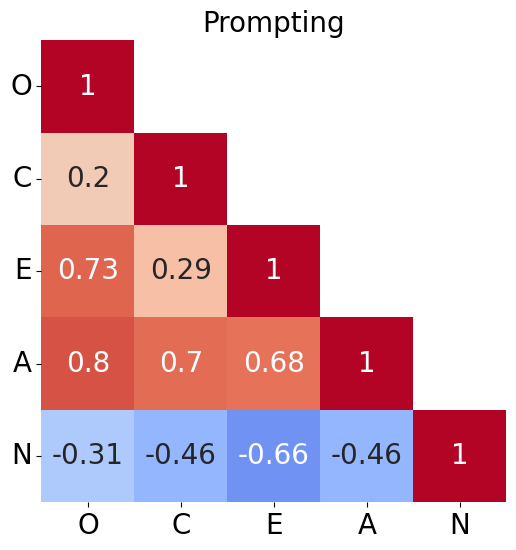

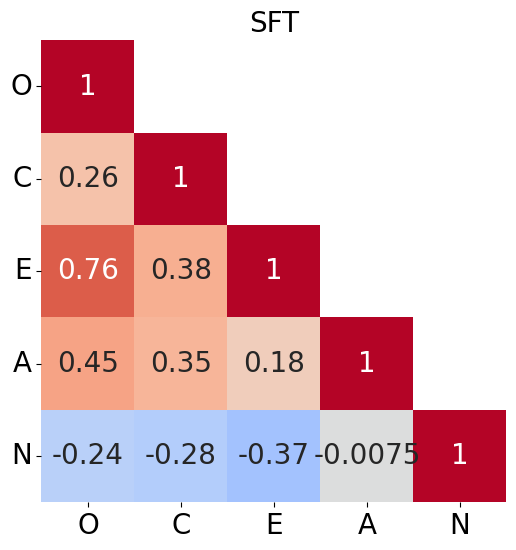

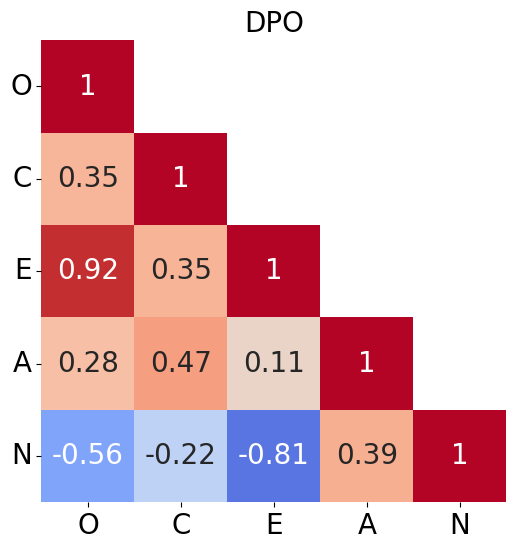

In [80]:
for method, method_abbr in [["Prompt", "prompt_chat"], ["SFT", "train"], ['DPO', "train_dpo"]]:
    df_corr = pd.DataFrame(raw_data[method])
    df_corr.columns = df_corr.index = ['O', 'C', 'E', 'A', 'N']
    
    # correlation_matrix = df_corr.corr()
    print("Method: ", method)
    # print(correlation_matrix)
    plt.figure(figsize=(6, 6))
    mask = np.triu(np.ones_like(df_corr, dtype=bool), 1)
    sns.heatmap(df_corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 20}, cbar=False)
    if method == 'Prompt':
        method = "Prompting"
    plt.title(f'{method}', fontsize=20)
    # plt.xticks([])
    plt.xticks(fontsize=20, rotation=0)
    plt.yticks(fontsize=20, rotation=0)
    plt.savefig(f"stats/plots/corr/correlation_matrix_{method_abbr}.pdf", format="pdf", bbox_inches="tight")

In [81]:
def frobenius_norm(human_corr, model_corr):
    # Convert DataFrames to numpy arrays
    human_matrix = human_corr.values
    model_matrix = model_corr.values
    
    # Compute the difference matrix
    difference_matrix = human_matrix - model_matrix
    
    # Compute Frobenius norm
    frobenius = np.linalg.norm(difference_matrix, 'fro')
    
    return frobenius

# Calculate Frobenius norms for the methods, lower values are better
for method in ['Prompt', 'SFT', 'DPO']:
    frobenius_res = frobenius_norm(human_corr, raw_data[method])

    print(f"Frobenius norm for {method}: {frobenius_res}")

Frobenius norm for Prompt: 2.951856457442564
Frobenius norm for SFT: 3.015500171024146
Frobenius norm for DPO: 3.359109843821681


# Human data PsychGenerator

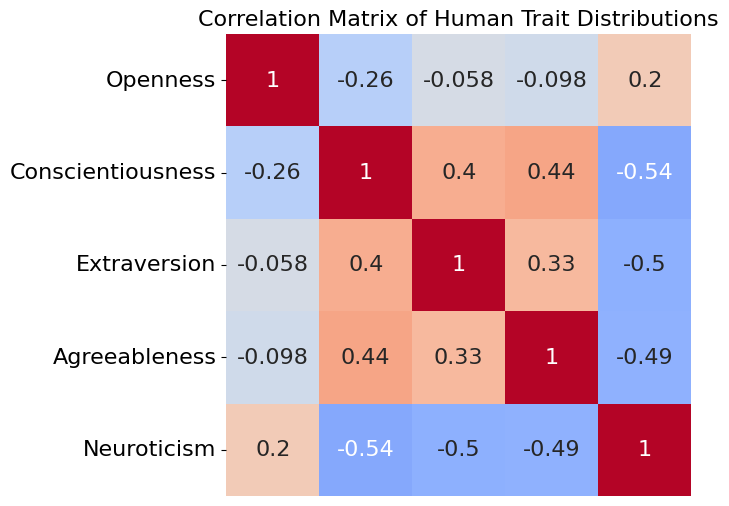

In [69]:
import pandas as pd
import numpy as np
df = pd.read_csv("/home/jiaruil5/personality/llm_personality/psychgenerator_opensource/data/big5_training_data.csv", header = 0, index_col = 0)
from scipy.stats import skew, kurtosis, probplot
import matplotlib.pyplot as plt
import seaborn as sns
df = df[['ope_z', 'con_z', 'ext_z', 'agr_z', 'neu_z']]
# df = df[['ope_z_level', 'con_z_level', 'ext_z_level', 'agr_z_level', 'neu_z_level']]
df = df.rename(columns={"ope_z": "Openness", "con_z": "Conscientiousness", "ext_z": "Extraversion", "agr_z": "Agreeableness", "neu_z": "Neuroticism"})
human_corr2 = df.corr()
# Correlation Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(human_corr2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 16}, cbar=False)
plt.title('Correlation Matrix of Human Trait Distributions', fontsize=16)
plt.xticks([])
# plt.xticks(fontsize=16, rotation=30)  # Set x-axis tick labels font size
plt.yticks(fontsize=16)  # Set y-axis tick labels font size
# cbar = plt.gca().collections[0].colorbar
# cbar.ax.tick_params(labelsize=16)
plt.show()
# plt.savefig("stats/plots/corr/correlation_matrix_human.pdf", format="pdf", bbox_inches="tight")